In [52]:
import pickle
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline


In [2]:
def load_data(path = './'):
    inbox_df = pd.read_csv(path + 'inbox.csv')
    spam_df = pd.read_csv(path + 'gmail_spam.csv')
    return inbox_df, spam_df

In [4]:
inbox_df , spam_df = load_data()
inbox_df.head()

,id,text,subject,from
0,12628,مختارات ‏‎Khaled‎‏\r\nمختارات Quora الخاصة بك\...,ما هي الدورة الشهرية للرجال؟ كيف ومتى تحدث؟,arabic-personalized-digest@quora.com
1,12627,Khaled's Digest\r\n\r\n-----\r\n\r\nQuestion: ...,Is the JVM written in Java?,english-personalized-digest@quora.com
2,12626,Stories for Accnew\r\n@accnew820 (https://medi...,How I got Amazon Data Scientist Offer (2021) w...,noreply@medium.com
3,12625,NaN,"Procrastinators, we see you 👀",team@hello.tailorbrands.com
4,12624,LinkedIn | Your job alert for python develope...,1 new job for 'python developer',jobalerts-noreply@linkedin.com


In [6]:
inbox_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       500 non-null    int64 
 1   text     463 non-null    object
 2   subject  500 non-null    object
 3   from     500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [11]:
def to_pickle(data,name, path = './'):
    data.to_pickle(f'{path}{name}.pkl')

to_pickle(inbox_df, 'inbox_df')
to_pickle(spam_df, 'spam_df')

In [18]:
inbox_df['class'] = 'ham'
spam_df['class'] = 'spam'
all_df = pd.concat([inbox_df, spam_df])
all_df['class'] = all_df['class'].map({'spam':1, 'ham':0})
all_df.head()
to_pickle(all_df, 'all_df')

In [25]:
with open('all_df.pkl','rb') as f:
    emails_df = pickle.load(f)

emails_df = emails_df.reset_index(drop=True)
emails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       514 non-null    int64 
 1   text     511 non-null    object
 2   subject  514 non-null    object
 3   from     514 non-null    object
 4   class    514 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 20.2+ KB


In [28]:
from string import punctuation
import re
def clean_email(email):
    """ Remove all punctuation, urls, numbers, and newlines.
    Convert to lower case.
    Args:
        email (unicode): the email
    Returns:
        email (unicode): only the text of the email
    """
    
    email = re.sub(r'http\S+', ' ', email)
    email = re.sub("\d+", " ", email)
    email = email.replace('\n', ' ')
    email = email.translate(str.maketrans("", "", punctuation))
    email = email.lower()
    return email
emails_df['text'] = emails_df['text'].apply(str)
emails_df['text'] = emails_df['text'].apply(clean_email)
emails_df.head()

,id,text,subject,from,class
0,12628,مختارات ‏‎khaled‎‏\r مختارات quora الخاصة بك\r...,ما هي الدورة الشهرية للرجال؟ كيف ومتى تحدث؟,arabic-personalized-digest@quora.com,0
1,12627,khaleds digest\r \r \r \r question is the jvm ...,Is the JVM written in Java?,english-personalized-digest@quora.com,0
2,12626,stories for accnew\r accnew \r ·become a mem...,How I got Amazon Data Scientist Offer (2021) w...,noreply@medium.com,0
3,12625,nan,"Procrastinators, we see you 👀",team@hello.tailorbrands.com,0
4,12624,linkedin your job alert for python developer...,1 new job for 'python developer',jobalerts-noreply@linkedin.com,0


In [31]:
import nltk
from nltk.stem.snowball import SnowballStemmer
# nltk.download('wordnet') # uncomment to download 'wordnet'
from nltk.corpus import wordnet as wn
def preproces_text(email):
    """ Split the text string into individual words, stem each word,
    and append the stemmed word to words. Make sure there's a single
    space between each stemmed word.
    Args:
        email (unicode): the email
    Returns:
        words (unicode): the text of the email
    """
    
    words = ""
    # Create the stemmer.
    stemmer = SnowballStemmer("english")
    # Split text into words.
    email = email.split()
    for word in email:
        # Optional: remove unknown words.
        # if wn.synsets(word):
        words = words + stemmer.stem(word) + " "
    
    return words
emails_df['text'] = emails_df['text'].apply(preproces_text)
emails_df['text'][0]



'مختارات \u200f\u200ekhaled\u200e\u200f مختارات quora الخاصة بك السؤال ما هي الدورة الشهرية للرجال؟ كيف ومتى تحدث؟ إجابة من \u200fدهــب au\u200f ربما سمعت بعض الأحاديث التي تدور حول الدورة الشهرية للرجال،هل بالفعل لدى الرجل دورة شهرية؟ تعرف الدورة الشهرية للرجال بدورة التستوستيرون اليومية، وذلك لأنه هذا الهرمون هو اله قراءة النشرة \u200f\u200e السؤال هل تعرضت للتحرش أو الاغتصاب وقمت بأخذ حقك بعدها؟ إجابة من \u200fمحمد الموسوي mohammad almusawi\u200f نعم أتذكر مرة تعرضت للتحرش ربما البعض يستغرب مني و أنا رجل فكيف تم التحرش بي ؟ عنده ذهابي الى السوق يوم الجمعة في سنة كان عمري سنة تقريبأ ،كنت في الباص مع بقية الناس قراءة النشرة \u200f\u200e السؤال لماذا الإنسان لا يعطس وهو نائم؟ إجابة من سماء احمد اليس هذا احد الأسئلة التي تخطر علي بال جميعنا؟ ادركت أنه لنعرف السبب خلف عدم العطس اثناء النوم علينا ان نعرف اولًا كيف يحدث فعل العطس؟ ما يحدث هو كالتالي، العطس ناتج عن قراءة النشرة \u200f\u200e السؤال كيف أتقن اللغة الإنجليزية بشكلٍ تام وكأنَّها لغتي الأُم؟ إجابة من \u200f\u200ehasnaa abdul\u20

In [32]:
emails_df.groupby('class').describe()


id                                                               \
       count       mean         std      min       25%      50%       75%   
class                                                                       
0      500.0  12377.878  144.999658  12127.0  12252.75  12377.5  12503.25   
1       14.0    771.500    4.183300    765.0    768.25    771.5    774.75   

                
           max  
class           
0      12628.0  
1        778.0

Text(0.5, 1.0, 'Count Plot')

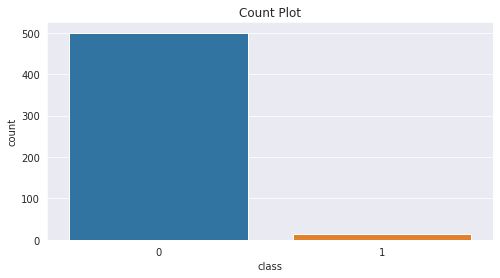

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=(8,4))
sns.countplot(x='class', data=emails_df)

plt.title('Count Plot')

In [37]:
emails_df['length'] = emails_df['text'].apply(len)
emails_df.head()

,id,text,subject,from,class,length
0,12628,مختارات ‏‎khaled‎‏ مختارات quora الخاصة بك الس...,ما هي الدورة الشهرية للرجال؟ كيف ومتى تحدث؟,arabic-personalized-digest@quora.com,0,1518
1,12627,khale digest question is the jvm written in ja...,Is the JVM written in Java?,english-personalized-digest@quora.com,0,1203
2,12626,stori for accnew accnew ·becom a member today ...,How I got Amazon Data Scientist Offer (2021) w...,noreply@medium.com,0,3778
3,12625,nan,"Procrastinators, we see you 👀",team@hello.tailorbrands.com,0,4
4,12624,linkedin your job alert for python develop in ...,1 new job for 'python developer',jobalerts-noreply@linkedin.com,0,557


<Figure size 576x288 with 0 Axes>

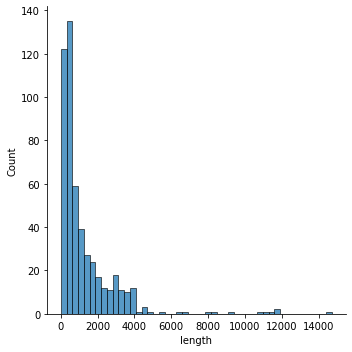

In [39]:
plt.figure(figsize=(8,4))
sns.displot(emails_df[('length')])

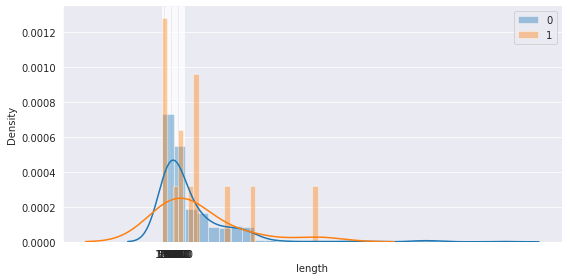

In [53]:
g = sns.FacetGrid(data=emails_df, hue="class", height=4, aspect=2)
g.map(sns.distplot, 'length', bins=30)
g.set(xticks=np.arange(0,1000,50))
plt.legend()